In [ ]:
import cv2
import time

import numpy as np
import pandas as pd

from jump_detect import JumpCounter

VIDEO_SOURCE = 0  # Camera input
VIDEO_SOURCE = 'newVideo.mp4' #jump_rope.webm'#'rope_jump_3.mp4'  # File input

BOUNDING_BOX_SCALE_FACTOR = 0.7

GREEN = (0, 255, 0)
RED = (0, 0, 255)


def _show_frame(frame, box, color, jumps):
    if box is not None:
        (x, y, w, h) = map(int, box)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 3)
        cv2.putText(frame, f'{jumps}', (0, 70), cv2.FONT_HERSHEY_SIMPLEX, 3, (36, 255, 12), 6)
    cv2.imshow("Video", frame)


def _scale_box(box, f):
    if box is None:
        return None
    (x, y, w, h) = box
    return x + int(.5 * w * (1 - f)), y + int(.5 * h * (1 - f)), w * f, h * f
def _smaller_box(box):
    return _scale_box(box, BOUNDING_BOX_SCALE_FACTOR)


def _bigger_box(box):
    return _scale_box(box, 0.9/BOUNDING_BOX_SCALE_FACTOR)


def _init_tracker_and_box(cnts, frame, weights):
    box = cnts[np.argmax(weights)]
    box = _smaller_box(box)
    tracker = cv2.TrackerKCF_create()
    tracker.init(frame, tuple(box))
    return box, tracker


def _init_tracker_if_person_detected(frame, hog):
    (cnts, weights) = hog.detectMultiScale(
        frame,
        winStride=(4, 4),
        padding=(4, 4),
        scale=1.05)

    if len(cnts) == 0:
        return None, None

    return _init_tracker_and_box(cnts, frame, weights)
def _init_variables():
    # Capturing video
    video = cv2.VideoCapture(VIDEO_SOURCE)
    # Initializing the HOG person detector
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    tracker = None
    jump_counter = JumpCounter()
    return hog, jump_counter, tracker, video


def _get_tracker_get_box(frame, hog, tracker):
    if tracker is None:
        return _init_tracker_if_person_detected(frame, hog)

    (success, box) = tracker.update(frame)
    if not success:
        box = None
        tracker.clear()
        tracker = None

    return box, tracker

def _get_jump_count(box, jump_counter, video):
    if box is None:
        return 0

    if VIDEO_SOURCE == 0:
        timestamp = int(time.time())
    else:
        timestamp = video.get(cv2.CAP_PROP_POS_MSEC)

    return jump_counter.count_jumps(_bigger_box(box), timestamp)
def _q_key_pressed():
    return cv2.waitKey(1) == ord('q')


def _cleanup(video):
    video.release()
    cv2.destroyAllWindows()

def main_loop(f_count):

    hog, jump_counter, tracker, video = _init_variables()

    # Infinite while loop to treat stack of image as video
    while True:
        # Reading frame(image) from video
        check, frame = video.read()

        if frame is None:
            break

        f_count = f_count + 1
        box, tracker = _get_tracker_get_box(frame, hog, tracker)
        boxes_list.append(box)
        jumps = _get_jump_count(box, jump_counter, video)
        _show_frame(frame, _bigger_box(box), GREEN, jumps)

        if _q_key_pressed():
            break

    _cleanup(video)
    return f_count
boxes_list = []
f_count = 0
f_count = main_loop(f_count)
print(f_count)

boxes_list

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(boxes_list, columns=['x','y','w','h'])

df

ModuleNotFoundError: ignored

In [ ]:
import math
import statistics
def calculate_mean(data):
    mean = sum(data) / len(data)
    return mean

def calculate_std_dev(data):
    mean = calculate_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    std_dev = math.sqrt(variance)
    return std_dev

def calculate_median(data):
    median = statistics.median(data)
    return median

def calculate_mode(data):
    mode = statistics.mode(data)
    return mode

data = [77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 75.0, 75.0, 75.0, 75.0, 75.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 75.0, 75.0, 77.0, 79.0, 81.0, 81.0, 81.0, 81.0, 79.0, 77.0, 73.0, 69.0, 67.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 65.0, 69.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 65.0, 67.0, 71.0, 73.0, 75.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 77.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 71.0, 73.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 57.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 67.0, 69.0, 73.0, 75.0, 75.0, 75.0, 73.0, 69.0, 67.0, 63.0, 61.0, 59.0, 59.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 67.0, 71.0, 75.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 59.0, 57.0, 57.0, 57.0, 59.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 77.0, 75.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 59.0, 59.0, 59.0, 59.0, 61.0, 61.0, 63.0, 65.0, 67.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 59.0, 59.0, 61.0, 61.0, 63.0, 65.0, 67.0, 69.0, 73.0, 75.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 61.0, 61.0, 59.0, 59.0, 59.0, 61.0, 63.0, 65.0, 67.0, 69.0, 73.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 67.0, 71.0, 73.0, 75.0, 77.0, 79.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 65.0, 67.0, 69.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 67.0, 71.0, 73.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 69.0, 71.0, 73.0, 75.0, 77.0, 77.0, 75.0, 73.0, 71.0, 69.0]
     


mean = calculate_mean(data)
std_dev = calculate_std_dev(data)
median = calculate_median(data)
mode = calculate_mode(data)

print("Mean:", mean)
print("Standard deviation:", std_dev)
print("Median:", median)
print("Mode:",mode)

Mean: 66.50588235294117
Standard deviation: 7.250190308920927
Median: 65.0
Mode: 73.0


In [ ]:
st=1
end=10
while st <= end:
    if st % 2 == 0:
        print("Value : ", st)
    st += 1

Value :  2
Value :  4
Value :  6
Value :  8
Value :  10


prime numbers
odd or even
fibonacci
palindrome
rational and irrational
print 10 numbers
numbers in reverse order
in a sentence, middle word as a output


Find median using functions

Find Standard Deviation using functions


In [ ]:
import math

def calculate_std_dev(data):
    mean = sum(data) / len(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    std_dev = math.sqrt(variance)
    return std_dev

data = [77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 75.0, 75.0, 75.0, 75.0, 75.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 75.0, 75.0, 77.0, 79.0, 81.0, 81.0, 81.0, 81.0, 79.0, 77.0, 73.0, 69.0, 67.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 65.0, 69.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 65.0, 67.0, 71.0, 73.0, 75.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 77.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 71.0, 73.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 57.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 67.0, 69.0, 73.0, 75.0, 75.0, 75.0, 73.0, 69.0, 67.0, 63.0, 61.0, 59.0, 59.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 67.0, 71.0, 75.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 59.0, 57.0, 57.0, 57.0, 59.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 77.0, 75.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 59.0, 59.0, 59.0, 59.0, 61.0, 61.0, 63.0, 65.0, 67.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 59.0, 59.0, 61.0, 61.0, 63.0, 65.0, 67.0, 69.0, 73.0, 75.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 61.0, 61.0, 59.0, 59.0, 59.0, 61.0, 63.0, 65.0, 67.0, 69.0, 73.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 67.0, 71.0, 73.0, 75.0, 77.0, 79.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 65.0, 67.0, 69.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 67.0, 71.0, 73.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 69.0, 71.0, 73.0, 75.0, 77.0, 77.0, 75.0, 73.0, 71.0, 69.0]

std_dev = calculate_std_dev(data)

print("Standard deviation:", std_dev)

Standard deviation: 7.250190308920927


find mean using functions

In [ ]:
def calculate_mean(data):
    mean = sum(data) / len(data)
    return mean

data = [77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 75.0, 75.0, 75.0, 75.0, 75.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 75.0, 75.0, 77.0, 79.0, 81.0, 81.0, 81.0, 81.0, 79.0, 77.0, 73.0, 69.0, 67.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 65.0, 69.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 65.0, 67.0, 71.0, 73.0, 75.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 77.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 71.0, 73.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 57.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 67.0, 69.0, 73.0, 75.0, 75.0, 75.0, 73.0, 69.0, 67.0, 63.0, 61.0, 59.0, 59.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 67.0, 71.0, 75.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 59.0, 57.0, 57.0, 57.0, 59.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 77.0, 75.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 59.0, 59.0, 59.0, 59.0, 61.0, 61.0, 63.0, 65.0, 67.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 59.0, 59.0, 61.0, 61.0, 63.0, 65.0, 67.0, 69.0, 73.0, 75.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 61.0, 61.0, 59.0, 59.0, 59.0, 61.0, 63.0, 65.0, 67.0, 69.0, 73.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 67.0, 71.0, 73.0, 75.0, 77.0, 79.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 65.0, 67.0, 69.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 67.0, 71.0, 73.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 69.0, 71.0, 73.0, 75.0, 77.0, 77.0, 75.0, 73.0, 71.0, 69.0]

mean = calculate_mean(data)

print("Mean:", mean)

Mean: 66.50588235294117


In [ ]:
import statistics

data = [77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 75.0, 75.0, 75.0, 75.0, 75.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 75.0, 75.0, 77.0, 79.0, 81.0, 81.0, 81.0, 81.0, 79.0, 77.0, 73.0, 69.0, 67.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 65.0, 69.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 65.0, 67.0, 71.0, 73.0, 75.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 77.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 71.0, 73.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 57.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 67.0, 69.0, 73.0, 75.0, 75.0, 75.0, 73.0, 69.0, 67.0, 63.0, 61.0, 59.0, 59.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 67.0, 71.0, 75.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 59.0, 57.0, 57.0, 57.0, 59.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 77.0, 75.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 59.0, 59.0, 59.0, 59.0, 61.0, 61.0, 63.0, 65.0, 67.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 59.0, 59.0, 61.0, 61.0, 63.0, 65.0, 67.0, 69.0, 73.0, 75.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 61.0, 61.0, 59.0, 59.0, 59.0, 61.0, 63.0, 65.0, 67.0, 69.0, 73.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 67.0, 71.0, 73.0, 75.0, 77.0, 79.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 65.0, 67.0, 69.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 67.0, 71.0, 73.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 69.0, 71.0, 73.0, 75.0, 77.0, 77.0, 75.0, 73.0, 71.0, 69.0]
     


mean = statistics.mean(data)

print("Mean:", mean)

Mean: 66.50588235294117


In [ ]:
import cv2
import time

import numpy as np
import pandas as pd

from jump_detect import JumpCounter

VIDEO_SOURCE = 0  # Camera input
VIDEO_SOURCE = 'newVideo.mp4' #jump_rope.webm'#'rope_jump_3.mp4'  # File input

BOUNDING_BOX_SCALE_FACTOR = 0.7

GREEN = (0, 255, 0)
RED = (0, 0, 255)

ModuleNotFoundError: ignored

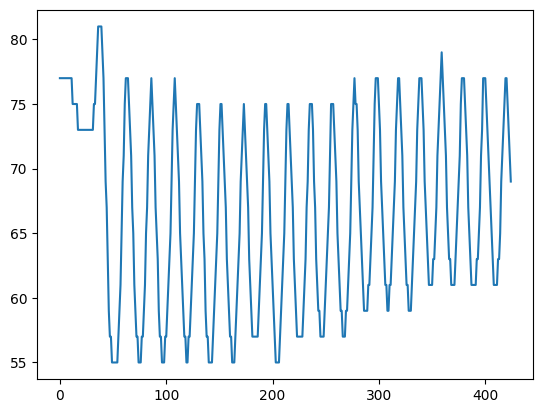

In [ ]:


data = [77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 75.0, 75.0, 75.0, 75.0, 75.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 75.0, 75.0, 77.0, 79.0, 81.0, 81.0, 81.0, 81.0, 79.0, 77.0, 73.0, 69.0, 67.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 65.0, 69.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 65.0, 67.0, 71.0, 73.0, 75.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 77.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 71.0, 73.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 57.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 75.0, 73.0, 71.0, 69.0, 67.0, 63.0, 61.0, 59.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 67.0, 69.0, 73.0, 75.0, 75.0, 75.0, 73.0, 69.0, 67.0, 63.0, 61.0, 59.0, 59.0, 57.0, 57.0, 57.0, 57.0, 59.0, 61.0, 63.0, 65.0, 67.0, 71.0, 75.0, 75.0, 75.0, 73.0, 71.0, 69.0, 65.0, 63.0, 61.0, 59.0, 59.0, 57.0, 57.0, 57.0, 59.0, 59.0, 61.0, 63.0, 65.0, 69.0, 73.0, 75.0, 77.0, 75.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 59.0, 59.0, 59.0, 59.0, 61.0, 61.0, 63.0, 65.0, 67.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 59.0, 59.0, 61.0, 61.0, 63.0, 65.0, 67.0, 69.0, 73.0, 75.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 61.0, 61.0, 59.0, 59.0, 59.0, 61.0, 63.0, 65.0, 67.0, 69.0, 73.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 67.0, 71.0, 73.0, 75.0, 77.0, 79.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 65.0, 67.0, 69.0, 71.0, 75.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 67.0, 71.0, 73.0, 77.0, 77.0, 77.0, 75.0, 73.0, 71.0, 69.0, 67.0, 65.0, 63.0, 61.0, 61.0, 61.0, 61.0, 63.0, 63.0, 65.0, 69.0, 71.0, 73.0, 75.0, 77.0, 77.0, 75.0, 73.0, 71.0, 69.0]
     

import matplotlib.pyplot as plt
     

plt.plot(data)



In [ ]:
for num in range(10,21):
  for i in range(2,num):
    if(num%i)==0:
      break
    else:
      print(num)

11
11
11
11
11
11
11
11
11
13
13
13
13
13
13
13
13
13
13
13
15
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19


In [ ]:
Lower=10
Upper=20

for i in range(Lower,Upper+1):
  for j in range(2,i):
    if i%j==0:
      break
  else:
    print(i,end="-->")

  

  

11-->13-->17-->19-->

In [ ]:
Fruits=["Apple","Banana","Strawberry"]
for i in range(len(Fruits)):
  print("Current fruit:",Fruits[i])

Current fruit: Apple
Current fruit: Banana
Current fruit: Strawberry


In [ ]:
Fruits=["Apple","Banana","Strawberry"]
for fruit in Fruits:
  print("Current fruit:",fruit)

Current fruit: Apple
Current fruit: Banana
Current fruit: Strawberry


In [ ]:
for letter in "Python":
    print("Current letter:",letter)

Current letter: P
Current letter: y
Current letter: t
Current letter: h
Current letter: o
Current letter: n


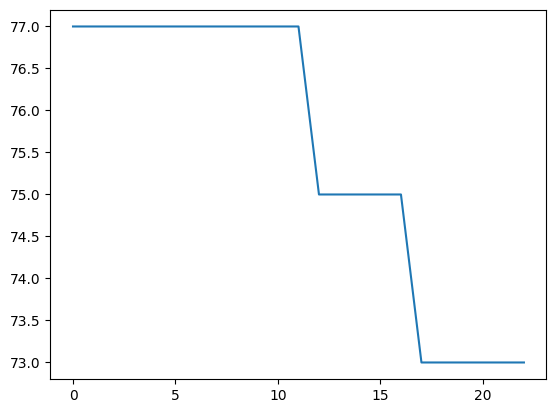

In [ ]:
data = [77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 75.0, 75.0, 75.0, 75.0, 75.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0]
import matplotlib.pyplot as plt
     

plt.plot(data)


Find Mean from a list of numbers




In [ ]:
numbers = [15, 23, 8, 45, 98, 67, 32, 11, 79, 54]
sum_numbers = 0 

for number in numbers:
    sum_numbers += number

mean = sum_numbers / len(numbers)

print("The mean of the list is:", mean)

The mean of the list is: 43.2


In [ ]:
numbers = [15, 23, 8, 45, 98, 67, 32, 11, 79, 54] 
sum_numbers = 0  
n = len(numbers) 

i = 0 
while i < n:
    sum_numbers += numbers[i]
    i += 1

mean = sum_numbers / n

print("The mean of the list is:", mean)

The mean of the list is: 43.2


Find a median in a list of N numbers

In [ ]:
numbers = [15, 23, 8, 45, 98, 67, 32, 11, 79, 54]  
numbers.sort()  

if len(numbers) % 2 == 0:  
    median_index_1 = len(numbers) // 2 - 1
    median_index_2 = median_index_1 + 1
    median = (numbers[median_index_1] + numbers[median_index_2]) / 2
else:  
    median_index = len(numbers) // 2
    median = numbers[median_index]

print("The median of the list is:", median)

The median of the list is: 38.5


In [ ]:
numbers = [15, 23, 8, 45, 98, 67, 32, 11, 79, 54]  
numbers.sort()  

n = len(numbers)
mid = n // 2

if n % 2 == 0:  
    median = (numbers[mid - 1] + numbers[mid]) / 2
else:  
    median = numbers[mid]

print("The median of the list is:", median)

The median of the list is: 38.5


Find 2 nd highest number in a list of 10 numbers

In [ ]:
numbers = [15, 23, 8, 45, 98, 67, 32, 11, 79, 54]  
max_number = numbers[0]  
second_max_number = numbers[0]  

for number in numbers:
    if number > max_number:
        second_max_number = max_number
        max_number = number
    elif number > second_max_number and number != max_number:
        second_max_number = number

print("The 2nd highest number in the list is:", second_max_number)

The 2nd highest number in the list is: 79


Find highest number in a list of 10 numbers

In [ ]:
numbers = [15, 23, 8, 45, 98, 67, 32, 11, 79, 54]  
max_number = numbers[0]  

for number in numbers:
    if number > max_number:
        max_number = number

print("The highest number in the list is:", max_number)

The highest number in the list is: 98


Check whether the input string is palindrome or not using while loop and for loop




In [ ]:
string = input("Enter a string: ")
string = string.replace(" ", "")
left = 0
right = len(string) - 1
while left < right:
    if string[left] != string[right]:
        print("The string is not a palindrome.")
        break
    left += 1
    right -= 1
else:
    print("The string is a palindrome.")

Enter a string: xerox
The string is not a palindrome.


In [ ]:
string = input("Enter a string: ")
string = string.replace(" ", "")
is_palindrome = True
for i in range(len(string)//2):
    if string[i] != string[-i-1]:
        is_palindrome = False
        break
if is_palindrome:
    print("The string is a palindrome.")
else:
    print("The string is not a palindrome.")


Enter a string: bob
The string is a palindrome.


Generate prime numbers using both for loop and while loop

In [ ]:
n = 10
prime_numbers = []
for num in range(2, n+1):
    is_prime = True
    for i in range(2, int(num**0.5)+1):
        if num % i == 0:
            is_prime = False
            break
    if is_prime:
        prime_numbers.append(num)
print(prime_numbers)


[2, 3, 5, 7]


In [ ]:
n = 10
prime_numbers = []
for num in range(2, n+1):
    is_prime = True
    for i in range(2, int(num**0.5)+1):
        if num % i == 0:
            is_prime = False
            break
    if is_prime:
        prime_numbers.append(num)
print(prime_numbers)

[2, 3, 5, 7]


Check whether the given number is prime or not using both while and for loops

In [ ]:
n = int(input("Enter a number: "))
if n < 2:
    print("The number is not prime.")
else:
    i = 2
    while i <= n // 2:
        if n % i == 0:
            print("The number is not prime.")
            break
        i += 1
    else:
        print("The number is prime.")

Enter a number: 0
The number is not prime.


In [ ]:
n = int(input("Enter a number: "))
if n < 2:
    print("The number is not prime.")
else:
    for i in range(2, n // 2 + 1):
        if n % i == 0:
            print("The number is not prime.")
            break
    else:
        print("The number is prime.")

Enter a number: 1
The number is not prime.


Gnerate Fibonacii numbers using both for loop and while loop

In [ ]:
n = 10
fib = [0, 1]
for i in range(2, n):
    current_fib = fib[i-1] + fib[i-2]
    fib.append(current_fib)
print(fib)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [ ]:
n = 10
fib1, fib2 = 0, 1
print(fib1)
print(fib2)
i = 2
while i < n:
    current_fib = fib1 + fib2
    print(current_fib)
    fib1, fib2 = fib2, current_fib
    i += 1


0
1
1
2
3
5
8
13
21
34


while loop to display pyramid:

In [ ]:
rows = 5
i = 1
while i <= rows:
    print(" "*(rows-i) + "*"*(2*i-1))
    i += 1

    *
   ***
  *****
 *******
*********


for loop to display pyramid:

In [ ]:
rows = 5
for i in range(1, rows+1):
    print(" "*(rows-i) + "*"*(2*i-1))

    *
   ***
  *****
 *******
*********


for loop:


In [ ]:
for i in range(10):
    for j in range(i+1):
        print('*', end='')
    print()
    

*
**
***
****
*****
******
*******
********
*********
**********


In [ ]:
for i in range(10):
    for j in range(1, 10 - i):
        print(" ", end="")
    for k in range(0, i + 1):
        print("*", end="")
    print()

         *
        **
       ***
      ****
     *****
    ******
   *******
  ********
 *********
**********


In [ ]:
for i in range(10):
    for j in range(i,10):
        print("*", end="")
    print()

**********
*********
********
*******
******
*****
****
***
**
*


In [ ]:
for i in range(10):
    for j in range(i):
        print(" ", end="")
    for j in range(10, i, -1):
        print("*", end="")
    print()

**********
 *********
  ********
   *******
    ******
     *****
      ****
       ***
        **
         *


In [ ]:
for i in range(10)
 for j in range(i,10,-1)
    print(" ")
 for k in range(i,10,1) 
    print("*")
print()      


SyntaxError: ignored

In [ ]:
rows = 10
i = 1
while i <= rows:
    print("*" * i)
    i += 1

*
**
***
****
*****
******
*******
********
*********
**********


In [ ]:
rows = 10
i = rows
while i >= 1:
    print("*" * i)
    i += 10

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: ignored

In [ ]:
i = 0
for i in range(0, 10,2):  # 0 initial , 10 termination, 2 update
  print(i, end='\n')
     

0
2
4
6
8


In [ ]:
i = 0 # intial value
while i<10:  # terminate condition
  print(i, end=',')
  i = i+2   # update condition

0,2,4,6,8,

In [ ]:
i = 0 # intial value
while i<10:  # terminate condition
  print(i, end=',')

0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

KeyboardInterrupt: ignored

In [ ]:
for i in range(0, 10):
  print(i)
  i = 0
  print(i)
     

0
0
1
0
2
0
3
0
4
0
5
0
6
0
7
0
8
0
9
0


In [ ]:
a = 15
b = 30
print('a address', id(a))  # pointer variable
print('b address', id(b))  # pointer variable

a address 140371252374256
b address 140371252374736


In [ ]:
c = a
print('c address', id(c))  # pointer variable
print('a address', id(a))  # pointer variable

c address 140371252374256
a address 140371252374256


In [ ]:
x = 20
y = 20
print('x address', id(x))  # pointer variable
print('y address', id(y))  # pointer variable
     

x address 140371252374416
y address 140371252374416


In [ ]:
#Nested loop - loop within a loop

list1 = [1,2,3,4,5]

for i in list1:  # [1,2,3,4,5]
    for j in list1: # [1,2,3,4,5]
      print(i, j)   # i = 1, j = [1,2,3,4,5],    i = 2, j = [1,2,3,4,5]  , i = 3, j = [1,2,3,4,5]

1 1
1 2
1 3
1 4
1 5
2 1
2 2
2 3
2 4
2 5
3 1
3 2
3 3
3 4
3 5
4 1
4 2
4 3
4 4
4 5
5 1
5 2
5 3
5 4
5 5


In [ ]:
for i in range(5):  # by default (0,5,1)
  print(i)


0
1
2
3
4


In [ ]:
for i in range(0,5,1):  # by default (5)
  print(i)

0
1
2
3
4


In [ ]:
for i in range(4, 10):
  print(i)

4
5
6
7
8
9


In [ ]:
for i in range(4, 10, 2):  
  print(i)

4
6
8


In [ ]:
for i in range(4, 10, 20):  
  print(i)

4


In [ ]:
for i in range(0, -10, -2):  # i =0, i = i-2 , 
  print(i)

0
-2
-4
-6
-8


In [ ]:
for i in range(0, -10, 2):  # 0, -10, i = i + 2
  print(i)

In [ ]:
for i in range(5):
  print(i)

0
1
2
3
4


In [ ]:
list1 = [11,22,33,44,55]

for i in list1:
  print(i)

for i in range(len(list1)):
  print(i)

for i in range(len(list1)):
  print(list1[i])

11
22
33
44
55
0
1
2
3
4
11
22
33
44
55


In [ ]:

import time
import cv2
import numpy as np
import pandas as pd

from jump_detect import JumpCounter

VIDEO_SOURCE = 0  # Camera input
VIDEO_SOURCE = 'rope_skip4.mp4' #jump_rope.webm'#'rope_jump_3.mp4'  # File input

BOUNDING_BOX_SCALE_FACTOR = 0.7

GREEN = (0, 255, 0)
RED = (0, 0, 255)


def _show_frame(frame, box, color, jumps):
    if box is not None:
        (x, y, w, h) = map(int, box)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 3)
        cv2.putText(frame, f'{jumps}', (0, 70), cv2.FONT_HERSHEY_SIMPLEX, 3, (36, 255, 12), 6)
    cv2.imshow("Video", frame)


def _scale_box(box, f):
    if box is None:
        return None
    (x, y, w, h) = box
    return x + int(.5 * w * (1 - f)), y + int(.5 * h * (1 - f)), w * f, h * f


def _smaller_box(box):
    return _scale_box(box, BOUNDING_BOX_SCALE_FACTOR)


def _bigger_box(box):
    return _scale_box(box, 0.9/BOUNDING_BOX_SCALE_FACTOR)


def _init_tracker_and_box(cnts, frame, weights):
    box = cnts[np.argmax(weights)]
    box = _smaller_box(box)
    tracker = cv2.TrackerKCF_create()
    tracker.init(frame, tuple(box))
    return box, tracker


def _init_tracker_if_person_detected(frame, hog):
    (cnts, weights) = hog.detectMultiScale(
        frame,
        winStride=(4, 4),
        padding=(4, 4),
        scale=1.05)

    if len(cnts) == 0:
        return None, None

    return _init_tracker_and_box(cnts, frame, weights)


def _init_variables():
    # Capturing video
    video = cv2.VideoCapture(VIDEO_SOURCE)
    # Initializing the HOG person detector
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    tracker = None
    jump_counter = JumpCounter()
    return hog, jump_counter, tracker, video


def _get_tracker_get_box(frame, hog, tracker):
    if tracker is None:
        return _init_tracker_if_person_detected(frame, hog)

    (success, box) = tracker.update(frame)
    if not success:
        box = None
        tracker.clear()
        tracker = None

    return box, tracker


def _get_jump_count(box, jump_counter, video):
    if box is None:
        return 0

    if VIDEO_SOURCE == 0:
        timestamp = int(time.time())
    else:
        timestamp = video.get(cv2.CAP_PROP_POS_MSEC)

    return jump_counter.count_jumps(_bigger_box(box), timestamp)


def _q_key_pressed():
    return cv2.waitKey(1) == ord('q')


def _cleanup(video):
    video.release()
    cv2.destroyAllWindows()


def main_loop(f_count):

    hog, jump_counter, tracker, video = _init_variables()

    # Infinite while loop to treat stack of image as video
    while True:
        # Reading frame(image) from video
        check, frame = video.read()

        if frame is None:
            break

        f_count = f_count + 1
        box, tracker = _get_tracker_get_box(frame, hog, tracker)
        boxes_list.append(box)
        jumps = _get_jump_count(box, jump_counter, video)
        _show_frame(frame, _bigger_box(box), GREEN, jumps)

        if _q_key_pressed():
            break

    _cleanup(video)
    return f_count
boxes_list = []
f_count = 0
f_count = main_loop(f_count)
print(f_count)
425
boxes_list
[(233, 77, 103.6, 206.5),
 (233.0, 77.0, 104.0, 206.0),
 (233.0, 77.0, 104.0, 206.0),
 (233.0, 77.0, 104.0, 206.0),
 (233.0, 77.0, 104.0, 206.0),
 (233.0, 77.0, 104.0, 206.0),
 (233.0, 77.0, 104.0, 206.0),
 (233.0, 77.0, 104.0, 206.0),
 (233.0, 77.0, 104.0, 206.0),
 (233.0, 77.0, 104.0, 206.0),
 (233.0, 77.0, 104.0, 206.0),
 (235.0, 77.0, 104.0, 206.0),
 (233.0, 75.0, 104.0, 206.0),
 (235.0, 75.0, 104.0, 206.0),
 (233.0, 75.0, 104.0, 206.0),
 (235.0, 75.0, 104.0, 206.0),
 (233.0, 75.0, 104.0, 206.0),
 (235.0, 73.0, 104.0, 206.0),
 (233.0, 73.0, 104.0, 206.0),
 (235.0, 73.0, 104.0, 206.0),
 (233.0, 73.0, 104.0, 206.0),
 (235.0, 73.0, 104.0, 206.0),
 (233.0, 73.0, 104.0, 206.0),
 (235.0, 73.0, 104.0, 206.0),
 (233.0, 73.0, 104.0, 206.0),
 (235.0, 73.0, 104.0, 206.0),
 (233.0, 73.0, 104.0, 206.0),
 (235.0, 73.0, 104.0, 206.0),
 (233.0, 73.0, 104.0, 206.0),
 (235.0, 73.0, 104.0, 206.0),
 (233.0, 73.0, 104.0, 206.0),
 (235.0, 73.0, 104.0, 206.0),
 (233.0, 75.0, 104.0, 206.0),
 (235.0, 75.0, 104.0, 206.0),
 (233.0, 77.0, 104.0, 206.0),
 (235.0, 79.0, 104.0, 206.0),
 (233.0, 81.0, 104.0, 206.0),
 (235.0, 81.0, 104.0, 206.0),
 (233.0, 81.0, 104.0, 206.0),
 (235.0, 81.0, 104.0, 206.0),
 (233.0, 79.0, 104.0, 206.0),
 (235.0, 77.0, 104.0, 206.0),
 (233.0, 73.0, 104.0, 206.0),
 (235.0, 69.0, 104.0, 206.0),
 (235.0, 67.0, 104.0, 206.0),
 (235.0, 63.0, 104.0, 206.0),
 (235.0, 59.0, 104.0, 206.0),
 (235.0, 57.0, 104.0, 206.0),
 (235.0, 57.0, 104.0, 206.0),
 (235.0, 55.0, 104.0, 206.0),
 (235.0, 55.0, 104.0, 206.0),
 (235.0, 55.0, 104.0, 206.0),
 (235.0, 55.0, 104.0, 206.0),
 (235.0, 55.0, 104.0, 206.0),
 (235.0, 55.0, 104.0, 206.0),
 (235.0, 57.0, 104.0, 206.0),
 (235.0, 59.0, 104.0, 206.0),
 (235.0, 61.0, 104.0, 206.0),
 (235.0, 65.0, 104.0, 206.0),
 (235.0, 69.0, 104.0, 206.0),
 (235.0, 71.0, 104.0, 206.0),
 (235.0, 75.0, 104.0, 206.0),
 (233.0, 77.0, 104.0, 206.0),
 (235.0, 77.0, 104.0, 206.0),
 (233.0, 77.0, 104.0, 206.0),
 (233.0, 75.0, 104.0, 206.0),
 (233.0, 73.0, 104.0, 206.0),
 (233.0, 71.0, 104.0, 206.0),
 (233.0, 67.0, 104.0, 206.0),
 (233.0, 65.0, 104.0, 206.0),
 (233.0, 61.0, 104.0, 206.0),
 (231.0, 59.0, 104.0, 206.0),
 (229.0, 57.0, 104.0, 206.0),
 (231.0, 57.0, 104.0, 206.0),
 (229.0, 55.0, 104.0, 206.0),
 (229.0, 55.0, 104.0, 206.0),
 (229.0, 55.0, 104.0, 206.0),
 (229.0, 57.0, 104.0, 206.0),
 (229.0, 57.0, 104.0, 206.0),
 (227.0, 59.0, 104.0, 206.0),
 (225.0, 61.0, 104.0, 206.0),
 (225.0, 65.0, 104.0, 206.0),
 (223.0, 67.0, 104.0, 206.0),
 (221.0, 71.0, 104.0, 206.0),
 (221.0, 73.0, 104.0, 206.0),
 (221.0, 75.0, 104.0, 206.0),
 (221.0, 77.0, 104.0, 206.0),
 (219.0, 75.0, 104.0, 206.0),
 (217.0, 73.0, 104.0, 206.0),
 (219.0, 71.0, 104.0, 206.0),
 (217.0, 67.0, 104.0, 206.0),
 (219.0, 65.0, 104.0, 206.0),
 (219.0, 63.0, 104.0, 206.0),
 (219.0, 59.0, 104.0, 206.0),
 (221.0, 57.0, 104.0, 206.0),
 (223.0, 57.0, 104.0, 206.0),
 (223.0, 55.0, 104.0, 206.0),
 (223.0, 55.0, 104.0, 206.0),
 (223.0, 55.0, 104.0, 206.0),
 (223.0, 57.0, 104.0, 206.0),
 (223.0, 57.0, 104.0, 206.0),
 (223.0, 59.0, 104.0, 206.0),
 (221.0, 61.0, 104.0, 206.0),
 (223.0, 63.0, 104.0, 206.0),
 (221.0, 65.0, 104.0, 206.0),
 (221.0, 69.0, 104.0, 206.0),
 (221.0, 73.0, 104.0, 206.0),
 (221.0, 75.0, 104.0, 206.0),
 (221.0, 77.0, 104.0, 206.0),
 (221.0, 75.0, 104.0, 206.0),
 (221.0, 73.0, 104.0, 206.0),
 (221.0, 71.0, 104.0, 206.0),
 (221.0, 69.0, 104.0, 206.0),
 (223.0, 65.0, 104.0, 206.0),
 (221.0, 63.0, 104.0, 206.0),
 (223.0, 61.0, 104.0, 206.0),
 (223.0, 59.0, 104.0, 206.0),
 (223.0, 57.0, 104.0, 206.0),
 (223.0, 57.0, 104.0, 206.0),
 (223.0, 55.0, 104.0, 206.0),
 (223.0, 55.0, 104.0, 206.0),
 (223.0, 57.0, 104.0, 206.0),
 (223.0, 57.0, 104.0, 206.0),
 (223.0, 59.0, 104.0, 206.0),
 (223.0, 61.0, 104.0, 206.0),
 (223.0, 63.0, 104.0, 206.0),
 (223.0, 65.0, 104.0, 206.0),
 (223.0, 69.0, 104.0, 206.0),
 (223.0, 73.0, 104.0, 206.0),
 (223.0, 75.0, 104.0, 206.0),
 (223.0, 75.0, 104.0, 206.0),
 (223.0, 75.0, 104.0, 206.0),
 (223.0, 73.0, 104.0, 206.0),
 (223.0, 71.0, 104.0, 206.0),
 (223.0, 69.0, 104.0, 206.0),
 (223.0, 65.0, 104.0, 206.0),
 (223.0, 63.0, 104.0, 206.0),
 (223.0, 59.0, 104.0, 206.0),
 (223.0, 57.0, 104.0, 206.0),
 (223.0, 57.0, 104.0, 206.0),
 (223.0, 55.0, 104.0, 206.0),
 (223.0, 55.0, 104.0, 206.0),
 (223.0, 55.0, 104.0, 206.0),
 (223.0, 55.0, 104.0, 206.0),
 (223.0, 57.0, 104.0, 206.0),
 (223.0, 59.0, 104.0, 206.0),
 (223.0, 61.0, 104.0, 206.0),
 (221.0, 63.0, 104.0, 206.0),
 (223.0, 65.0, 104.0, 206.0),
 (221.0, 69.0, 104.0, 206.0),
 (221.0, 73.0, 104.0, 206.0),
 (221.0, 75.0, 104.0, 206.0),
 (221.0, 75.0, 104.0, 206.0),
 (221.0, 73.0, 104.0, 206.0),
 (221.0, 71.0, 104.0, 206.0),
 (221.0, 69.0, 104.0, 206.0),
 (221.0, 67.0, 104.0, 206.0),
 (221.0, 63.0, 104.0, 206.0),
 (221.0, 61.0, 104.0, 206.0),
 (221.0, 59.0, 104.0, 206.0),
 (221.0, 57.0, 104.0, 206.0),
 (221.0, 57.0, 104.0, 206.0),
 (221.0, 55.0, 104.0, 206.0),
 (221.0, 55.0, 104.0, 206.0),
 (221.0, 55.0, 104.0, 206.0),
 (221.0, 57.0, 104.0, 206.0),
 (221.0, 59.0, 104.0, 206.0),
 (221.0, 61.0, 104.0, 206.0),
 (221.0, 63.0, 104.0, 206.0),
 (221.0, 65.0, 104.0, 206.0),
 (219.0, 69.0, 104.0, 206.0),
 (217.0, 71.0, 104.0, 206.0),
 (219.0, 73.0, 104.0, 206.0),
 (217.0, 75.0, 104.0, 206.0),
 (217.0, 73.0, 104.0, 206.0),
 (217.0, 71.0, 104.0, 206.0),
 (217.0, 69.0, 104.0, 206.0),
 (217.0, 67.0, 104.0, 206.0),
 (217.0, 63.0, 104.0, 206.0),
 (217.0, 61.0, 104.0, 206.0),
 (217.0, 59.0, 104.0, 206.0),
 (217.0, 57.0, 104.0, 206.0),
 (217.0, 57.0, 104.0, 206.0),
 (217.0, 57.0, 104.0, 206.0),
 (217.0, 57.0, 104.0, 206.0),
 (217.0, 57.0, 104.0, 206.0),
 (217.0, 57.0, 104.0, 206.0),
 (217.0, 59.0, 104.0, 206.0),
 (215.0, 61.0, 104.0, 206.0),
 (213.0, 63.0, 104.0, 206.0),
 (213.0, 65.0, 104.0, 206.0),
 (213.0, 69.0, 104.0, 206.0),
 (213.0, 73.0, 104.0, 206.0),
 (213.0, 75.0, 104.0, 206.0),
 (211.0, 75.0, 104.0, 206.0),
 (209.0, 73.0, 104.0, 206.0),
 (211.0, 71.0, 104.0, 206.0),
 (209.0, 69.0, 104.0, 206.0),
 (211.0, 65.0, 104.0, 206.0),
 (211.0, 63.0, 104.0, 206.0),
 (211.0, 61.0, 104.0, 206.0),
 (211.0, 59.0, 104.0, 206.0),
 (211.0, 57.0, 104.0, 206.0),
 (211.0, 55.0, 104.0, 206.0),
 (211.0, 55.0, 104.0, 206.0),
 (211.0, 55.0, 104.0, 206.0),
 (211.0, 55.0, 104.0, 206.0),
 (211.0, 57.0, 104.0, 206.0),
 (211.0, 59.0, 104.0, 206.0),
 (211.0, 61.0, 104.0, 206.0),
 (209.0, 63.0, 104.0, 206.0),
 (211.0, 65.0, 104.0, 206.0),
 (209.0, 69.0, 104.0, 206.0),
 (209.0, 73.0, 104.0, 206.0),
 (209.0, 75.0, 104.0, 206.0),
 (209.0, 75.0, 104.0, 206.0),
 (209.0, 73.0, 104.0, 206.0),
 (209.0, 71.0, 104.0, 206.0),
 (209.0, 69.0, 104.0, 206.0),
 (209.0, 67.0, 104.0, 206.0),
 (209.0, 63.0, 104.0, 206.0),
 (209.0, 61.0, 104.0, 206.0),
 (209.0, 59.0, 104.0, 206.0),
 (209.0, 57.0, 104.0, 206.0),
 (209.0, 57.0, 104.0, 206.0),
 (209.0, 57.0, 104.0, 206.0),
 (209.0, 57.0, 104.0, 206.0),
 (209.0, 57.0, 104.0, 206.0),
 (209.0, 57.0, 104.0, 206.0),
 (209.0, 59.0, 104.0, 206.0),
 (209.0, 61.0, 104.0, 206.0),
 (207.0, 63.0, 104.0, 206.0),
 (205.0, 67.0, 104.0, 206.0),
 (205.0, 69.0, 104.0, 206.0),
 (205.0, 73.0, 104.0, 206.0),
 (205.0, 75.0, 104.0, 206.0),
 (205.0, 75.0, 104.0, 206.0),
 (205.0, 75.0, 104.0, 206.0),
 (205.0, 73.0, 104.0, 206.0),
 (205.0, 69.0, 104.0, 206.0),
 (205.0, 67.0, 104.0, 206.0),
 (207.0, 63.0, 104.0, 206.0),
 (205.0, 61.0, 104.0, 206.0),
 (207.0, 59.0, 104.0, 206.0),
 (205.0, 59.0, 104.0, 206.0),
 (207.0, 57.0, 104.0, 206.0),
 (207.0, 57.0, 104.0, 206.0),
 (207.0, 57.0, 104.0, 206.0),
 (207.0, 57.0, 104.0, 206.0),
 (207.0, 59.0, 104.0, 206.0),
 (207.0, 61.0, 104.0, 206.0),
 (205.0, 63.0, 104.0, 206.0),
 (207.0, 65.0, 104.0, 206.0),
 (205.0, 67.0, 104.0, 206.0),
 (205.0, 71.0, 104.0, 206.0),
 (205.0, 75.0, 104.0, 206.0),
 (205.0, 75.0, 104.0, 206.0),
 (205.0, 75.0, 104.0, 206.0),
 (205.0, 73.0, 104.0, 206.0),
 (205.0, 71.0, 104.0, 206.0),
 (205.0, 69.0, 104.0, 206.0),
 (205.0, 65.0, 104.0, 206.0),
 (205.0, 63.0, 104.0, 206.0),
 (205.0, 61.0, 104.0, 206.0),
 (205.0, 59.0, 104.0, 206.0),
 (205.0, 59.0, 104.0, 206.0),
 (205.0, 57.0, 104.0, 206.0),
 (205.0, 57.0, 104.0, 206.0),
 (205.0, 57.0, 104.0, 206.0),
 (205.0, 59.0, 104.0, 206.0),
 (203.0, 59.0, 104.0, 206.0),
 (201.0, 61.0, 104.0, 206.0),
 (203.0, 63.0, 104.0, 206.0),
 (201.0, 65.0, 104.0, 206.0),
 (201.0, 69.0, 104.0, 206.0),
 (201.0, 73.0, 104.0, 206.0),
 (199.0, 75.0, 104.0, 206.0),
 (197.0, 77.0, 104.0, 206.0),
 (199.0, 75.0, 104.0, 206.0),
 (197.0, 75.0, 104.0, 206.0),
 (199.0, 73.0, 104.0, 206.0),
 (197.0, 69.0, 104.0, 206.0),
 (199.0, 67.0, 104.0, 206.0),
 (197.0, 65.0, 104.0, 206.0),
 (199.0, 63.0, 104.0, 206.0),
 (197.0, 61.0, 104.0, 206.0),
 (199.0, 59.0, 104.0, 206.0),
 (197.0, 59.0, 104.0, 206.0),
 (199.0, 59.0, 104.0, 206.0),
 (197.0, 59.0, 104.0, 206.0),
 (197.0, 61.0, 104.0, 206.0),
 (197.0, 61.0, 104.0, 206.0),
 (197.0, 63.0, 104.0, 206.0),
 (197.0, 65.0, 104.0, 206.0),
 (195.0, 67.0, 104.0, 206.0),
 (193.0, 71.0, 104.0, 206.0),
 (193.0, 75.0, 104.0, 206.0),
 (193.0, 77.0, 104.0, 206.0),
 (193.0, 77.0, 104.0, 206.0),
 (193.0, 77.0, 104.0, 206.0),
 (193.0, 75.0, 104.0, 206.0),
 (193.0, 73.0, 104.0, 206.0),
 (193.0, 69.0, 104.0, 206.0),
 (193.0, 67.0, 104.0, 206.0),
 (193.0, 65.0, 104.0, 206.0),
 (193.0, 63.0, 104.0, 206.0),
 (193.0, 61.0, 104.0, 206.0),
 (193.0, 61.0, 104.0, 206.0),
 (193.0, 59.0, 104.0, 206.0),
 (193.0, 59.0, 104.0, 206.0),
 (193.0, 61.0, 104.0, 206.0),
 (193.0, 61.0, 104.0, 206.0),
 (193.0, 63.0, 104.0, 206.0),
 (193.0, 65.0, 104.0, 206.0),
 (191.0, 67.0, 104.0, 206.0),
 (189.0, 69.0, 104.0, 206.0),
 (191.0, 73.0, 104.0, 206.0),
 (189.0, 75.0, 104.0, 206.0),
 (189.0, 77.0, 104.0, 206.0),
 (189.0, 77.0, 104.0, 206.0),
 (189.0, 75.0, 104.0, 206.0),
 (189.0, 73.0, 104.0, 206.0),
 (189.0, 71.0, 104.0, 206.0),
 (189.0, 67.0, 104.0, 206.0),
 (189.0, 65.0, 104.0, 206.0),
 (189.0, 63.0, 104.0, 206.0),
 (189.0, 61.0, 104.0, 206.0),
 (189.0, 61.0, 104.0, 206.0),
 (189.0, 59.0, 104.0, 206.0),
 (189.0, 59.0, 104.0, 206.0),
 (189.0, 59.0, 104.0, 206.0),
 (189.0, 61.0, 104.0, 206.0),
 (189.0, 63.0, 104.0, 206.0),
 (187.0, 65.0, 104.0, 206.0),
 (185.0, 67.0, 104.0, 206.0),
 (185.0, 69.0, 104.0, 206.0),
 (185.0, 73.0, 104.0, 206.0),
 (185.0, 75.0, 104.0, 206.0),
 (185.0, 77.0, 104.0, 206.0),
 (183.0, 77.0, 104.0, 206.0),
 (181.0, 77.0, 104.0, 206.0),
 (183.0, 75.0, 104.0, 206.0),
 (181.0, 73.0, 104.0, 206.0),
 (183.0, 69.0, 104.0, 206.0),
 (183.0, 67.0, 104.0, 206.0),
 (183.0, 65.0, 104.0, 206.0),
 (183.0, 63.0, 104.0, 206.0),
 (183.0, 61.0, 104.0, 206.0),
 (183.0, 61.0, 104.0, 206.0),
 (183.0, 61.0, 104.0, 206.0),
 (183.0, 61.0, 104.0, 206.0),
 (183.0, 63.0, 104.0, 206.0),
 (183.0, 63.0, 104.0, 206.0),
 (183.0, 65.0, 104.0, 206.0),
 (183.0, 67.0, 104.0, 206.0),
 (181.0, 71.0, 104.0, 206.0),
 (183.0, 73.0, 104.0, 206.0),
 (181.0, 75.0, 104.0, 206.0),
 (181.0, 77.0, 104.0, 206.0),
 (181.0, 79.0, 104.0, 206.0),
 (181.0, 77.0, 104.0, 206.0),
 (181.0, 75.0, 104.0, 206.0),
 (181.0, 73.0, 104.0, 206.0),
 (181.0, 71.0, 104.0, 206.0),
 (181.0, 67.0, 104.0, 206.0),
 (181.0, 65.0, 104.0, 206.0),
 (181.0, 63.0, 104.0, 206.0),
 (181.0, 63.0, 104.0, 206.0),
 (181.0, 61.0, 104.0, 206.0),
 (181.0, 61.0, 104.0, 206.0),
 (181.0, 61.0, 104.0, 206.0),
 (181.0, 61.0, 104.0, 206.0),
 (181.0, 63.0, 104.0, 206.0),
 (179.0, 65.0, 104.0, 206.0),
 (177.0, 67.0, 104.0, 206.0),
 (179.0, 69.0, 104.0, 206.0),
 (177.0, 71.0, 104.0, 206.0),
 (177.0, 75.0, 104.0, 206.0),
 (177.0, 77.0, 104.0, 206.0),
 (175.0, 77.0, 104.0, 206.0),
 (173.0, 77.0, 104.0, 206.0),
 (175.0, 75.0, 104.0, 206.0),
 (175.0, 73.0, 104.0, 206.0),
 (175.0, 71.0, 104.0, 206.0),
 (175.0, 67.0, 104.0, 206.0),
 (175.0, 65.0, 104.0, 206.0),
 (175.0, 63.0, 104.0, 206.0),
 (175.0, 61.0, 104.0, 206.0),
 (175.0, 61.0, 104.0, 206.0),
 (175.0, 61.0, 104.0, 206.0),
 (175.0, 61.0, 104.0, 206.0),
 (175.0, 61.0, 104.0, 206.0),
 (175.0, 63.0, 104.0, 206.0),
 (175.0, 63.0, 104.0, 206.0),
 (175.0, 65.0, 104.0, 206.0),
 (175.0, 67.0, 104.0, 206.0),
 (175.0, 71.0, 104.0, 206.0),
 (173.0, 73.0, 104.0, 206.0),
 (175.0, 77.0, 104.0, 206.0),
 (173.0, 77.0, 104.0, 206.0),
 (175.0, 77.0, 104.0, 206.0),
 (173.0, 75.0, 104.0, 206.0),
 (175.0, 73.0, 104.0, 206.0),
 (173.0, 71.0, 104.0, 206.0),
 (175.0, 69.0, 104.0, 206.0),
 (175.0, 67.0, 104.0, 206.0),
 (175.0, 65.0, 104.0, 206.0),
 (175.0, 63.0, 104.0, 206.0),
 (175.0, 61.0, 104.0, 206.0),
 (175.0, 61.0, 104.0, 206.0),
 (175.0, 61.0, 104.0, 206.0),
 (175.0, 61.0, 104.0, 206.0),
 (175.0, 63.0, 104.0, 206.0),
 (175.0, 63.0, 104.0, 206.0),
 (175.0, 65.0, 104.0, 206.0),
 (175.0, 69.0, 104.0, 206.0),
 (175.0, 71.0, 104.0, 206.0),
 (175.0, 73.0, 104.0, 206.0),
 (173.0, 75.0, 104.0, 206.0),
 (175.0, 77.0, 104.0, 206.0),
 (173.0, 77.0, 104.0, 206.0),
 (175.0, 75.0, 104.0, 206.0),
 (173.0, 73.0, 104.0, 206.0),
 (175.0, 71.0, 104.0, 206.0),
 (173.0, 69.0, 104.0, 206.0)]
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(boxes_list, columns=['x','y','w','h'])
df
x	y	w	h
0	233.0	77.0	103.6	206.5
1	233.0	77.0	104.0	206.0
2	233.0	77.0	104.0	206.0
3	233.0	77.0	104.0	206.0
4	233.0	77.0	104.0	206.0
...	...	...	...	...
420	173.0	77.0	104.0	206.0
421	175.0	75.0	104.0	206.0
422	173.0	73.0	104.0	206.0
423	175.0	71.0	104.0	206.0
424	173.0	69.0	104.0	206.0
425 rows × 4 columns

plt.plot(df['y'])
[<matplotlib.lines.Line2D at 0x222983246a0>]

 

SyntaxError: ignored

In [ ]:

Loops : for loop or while loop

days = ['Mon', 'Tue', 'wed', 'thur','fri','sat','sun']
     

for day in days:
  print("I am going to office on ", day)
     
I am going to office on  Mon
I am going to office on  Tue
I am going to office on  wed
I am going to office on  thur
I am going to office on  fri
I am going to office on  sat
I am going to office on  sun
While Loop

x = 10             # x = 10
while (x > 0):     # loop  x > 0  as long as x > 0
  print(x)         # keep printing
  x = x - 1        # x = x-1
     
10
9
8
7
6
5
4
3
2
1

x = 10             # x = 10
while (x > 0):     # loop  x > 0  as long as x > 0
  x = x - 1        # x = x-1
  print(x)         # keep printing
     
9
8
7
6
5
4
3
2
1
0
same output as above

days = ('Mon', 'Tue', 'wed', 'thur','fri','sat','sun')  # always starts from 0 ends at (len-1)
#      [0,       1,     2,      3,    4,    5,     6 ]

number_days = len(days)
print('total number of days ', number_days)

i = 0

while  i>0:

  print("I am going to office on ", days[i-1]) 
  i = i - 1
     
total number of days  7


     

{
  "nbformat": 4,
  "nbformat_minor": 0,
  "metadata": {
    "colab": {
      "provenance": []
    },
    "kernelspec": {
      "name": "python3",
      "display_name": "Python 3"
    },
    "language_info": {
      "name": "python"
    }
  },
  "cells": [
    {
      "cell_type": "markdown",
      "source": [
        "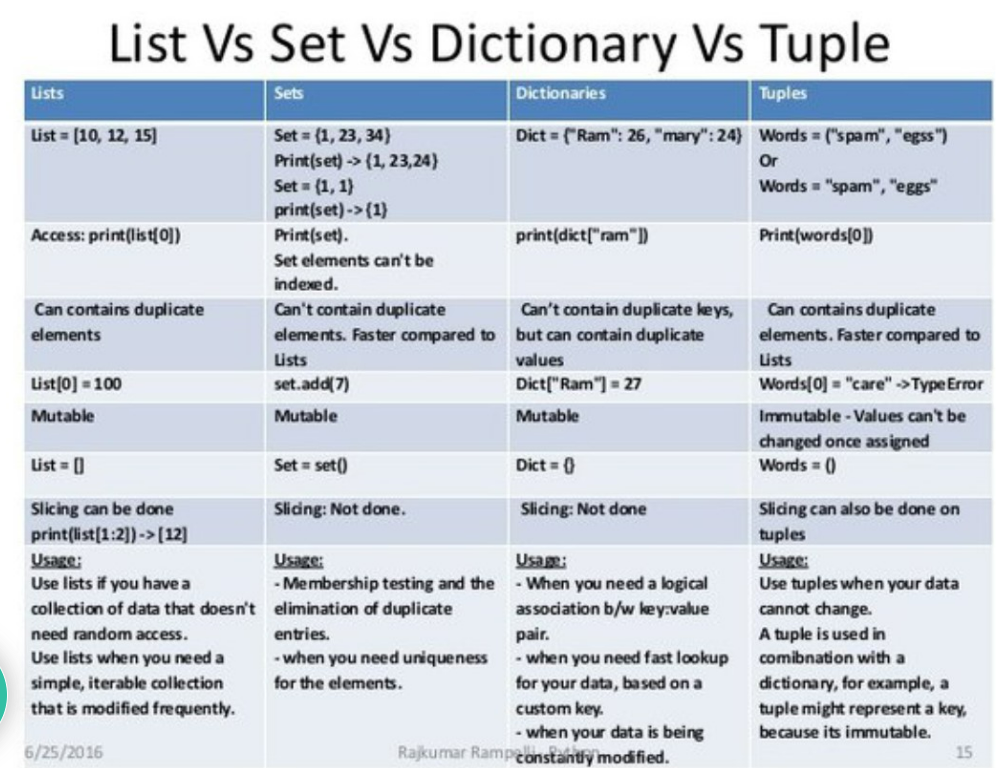"
      ],
      "metadata": {
        "id": "eKMXuihI8kEn"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "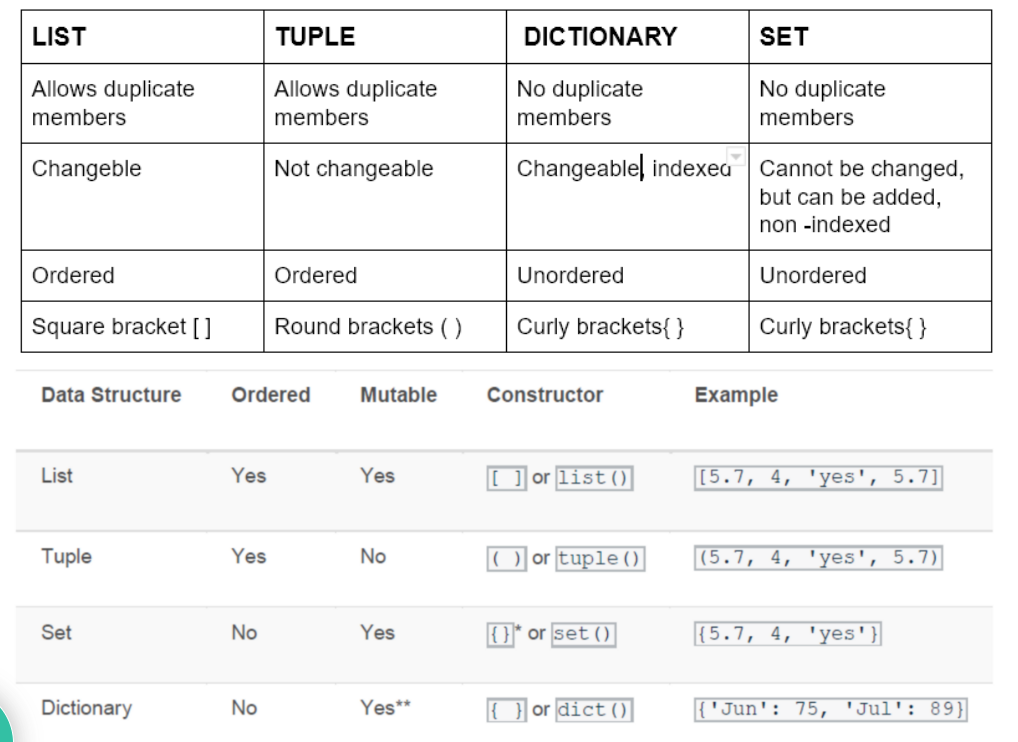"
      ],
      "metadata": {
        "id": "fJPH7pXR8t1e"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "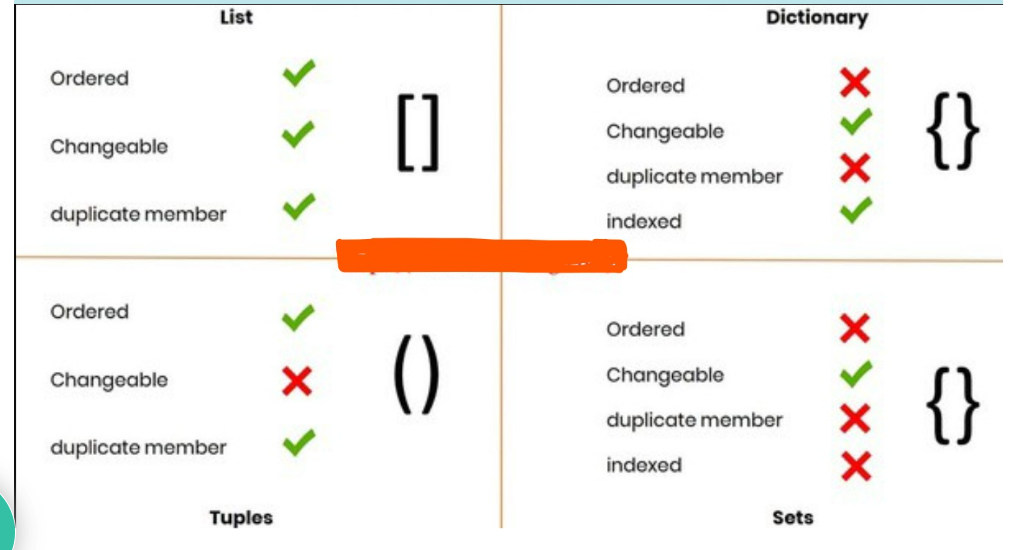"
      ],
      "metadata": {
        "id": "pHm6VNdu82fY"
      }
    },
    {
      "cell_type": "code",
      "execution_count": null,
      "metadata": {
        "id": "vNYxTxiHy8os"
      },
      "outputs": [],
      "source": []
    }
  ]
}

In [ ]:
# functions

def arith_ops(array, type_op):
    for i in range(0, 5):
        if type_op == 'add':
            array[i] = array[i]+array[i]
        elif type_op == 'sub':
            array[i] = array[i] - array[i]
        else:
            array[i] = array[i] * array[i]
    print(array)



array1 = [1,2,3,4,5]
array2 = [11,22,33,44,55]
array3 = [-1,-2,-3,-4,-5]
arith_ops(array1, 'add')
arith_ops(array2, 'sub')
arith_ops(array3, 'mul')

[2, 4, 6, 8, 10]
[0, 0, 0, 0, 0]
[1, 4, 9, 16, 25]


In [ ]:
# functions

array1 = [1,2,3,4,5]
for i in range(0, 5):
    array1[i] = array1[i]+array1[i]
print(array1)


array2 = [11,22,33,44,55]
for i in range(0, 5):
    array2[i] = array2[i]-array2[i]
print(array2)


array3 = [-1,-2,-3,-4,-5]
for i in range(0, 5):
    array3[i] = array3[i]*array3[i]
print(array3)

[2, 4, 6, 8, 10]
[0, 0, 0, 0, 0]
[1, 4, 9, 16, 25]


In [ ]:
days=[a,b,c,d,e,f,g]
number_days=

In [ ]:
x=10
while (x<0):
  print(x)
  x=x-1

In [ ]:

Dictionary
Create a dictionary to store person information


Dict_person = {"Name": "Chris",  # key : value -> name : chris
               "Age": 20,        #  key : value -> age : 20
               "city":"Bangalore"} #  key : value -> city : Bangalore
print(Dict_person)
     
{'Name': 'Chris', 'Age': 20, 'city': 'Bangalore'}

print(Dict_person.keys())
     
dict_keys(['Name', 'Age', 'city'])

print(Dict_person.values())
     
dict_values(['Chris', 20, 'Bangalore'])
Keys must be unique

Dict_person = {"Name": "Chris",  # key : value -> name : chris
               "Age": 20,        #  key : value -> age : 20
               "Name":"Bangalore"} #  key : value -> city : Bangalore
print(Dict_person)
     
{'Name': 'Bangalore', 'Age': 20}

Dict_person = {"Name": "Chris",  # key : value -> name : chris
               "Age": 20,        #  key : value -> age : 20
               "City":"Chris"} #  key : value -> city : Bangalore
print(Dict_person)
     
{'Name': 'Chris', 'Age': 20, 'City': 'Name'}

Dict_1_item = {"class": "Python"} # number of items - 1 
print(Dict_1_item)
     
{'class': 'Python'}
Single key with multiple values

dict_person = {"name": ("Guru","Prasad"), "city":["Bangalore","Tumkur"]}
print(dict_person)
     
{'name': ('Guru', 'Prasad'), 'city': ['Bangalore', 'Tumkur']}
Creating dictionary using dict() method

dict_cricker_operator = {'name': 'sachin', 'score': 200}  # operator  
dict_cricker_method = dict([(1, "a"),(2,"b"),(3,"c")])  # method, function , set, list, tuple
print(dict_cricker_operator, type(dict_cricker_operator))
print(dict_cricker_method, type(dict_cricker_method))
     
{'name': 'sachin', 'score': 200} <class 'dict'>
{1: 'a', 2: 'b', 3: 'c'} <class 'dict'>
Access elements


list1 = [11,22,33,44,55,66]
tuple1 = (11,22,33,44,55,66)
set1 = {11,22,33,44,55,66}
     

print(list1[2])
print(tuple1[2])
print(set1[2]) # does not allow indexing
     
33
33
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-22-d5984fff89d7> in <cell line: 3>()
      1 print(list1[2])
      2 print(tuple1[2])
----> 3 print(set1[2]) # does not allow indexing

TypeError: 'set' object is not subscriptable

print(list1[2])
print(tuple1[2])

for i, x in enumerate(set1):
  if i == 2:
    print(x)

     
33
33
22

dict_cric = {'name': 'sachin', 'score': 200, "dob":"11-11-2000"}  # operator  
     

print(dict_cric['name'])
     
sachin

print(dict_cric['score'])
     
200

print(dict_cric['dob'])
     
11-11-2000

for key in dict_cric.keys():
  print(key, dict_cric[key])
     
name sachin
score 200
dob 11-11-2000

for key, value in dict_cric.items():
  print(key, value)
     
name sachin
score 200
dob 11-11-2000

print(dict_cric)
     
{'name': 'sachin', 'score': 200, 'dob': '11-11-2000'}
Accessing the dictionary values

student_dict = {'ser_num':100, 'name':'Mohan', 'age':20} # container, collection, data structure                 # s_d, s, d, 
     

print(student_dict)
     
{'ser_num': 100, 'name': 'Mohan', 'age': 20}

print("ser_num", student_dict['ser_num'])
print('name', student_dict['name'])
print('age', student_dict['age'])
print('key as mohan', student_dict['Mohan']) #
     
ser_num 100
name Mohan
age 20
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-5-b5d89a4e319f> in <cell line: 4>()
      2 print('name', student_dict['name'])
      3 print('age', student_dict['age'])
----> 4 print('key as mohan', student_dict['Mohan']) #

KeyError: 'Mohan'

student_dict['city'] = 'Bangalore'
     

print(student_dict)
     
{'ser_num': 100, 'name': 'Mohan', 'age': 20, 'city': 'Bangalore'}

# Creating an empty Dictionary     
Dict = {}       # never ever use varibles / function names similar to the existing keywords for, while, if else
print("Empty Dictionary: ")     
print(Dict)     
      
# Adding elements to dictionary one at a time     
Dict[0] = 'Peter'    
Dict[1] = 'Joseph'    
Dict[2] = 'Ricky'    
print("\nDictionary after adding 3 elements: ")     
print(Dict)     
     
Empty Dictionary: 
{}

Dictionary after adding 3 elements: 
{0: 'Peter', 1: 'Joseph', 2: 'Ricky'}

Dict[2] = 'Kumar'
Dict[3] = 'Kumar'
print(Dict)
     
{0: 'Peter', 1: 'Joseph', 2: 'Kumar', 3: 'Kumar'}


# Adding set of values      
# with a single Key     
# The Emp_ages doesn't exist to dictionary    
Dict['Emp_ages'] = 20, 33, 24, 50
print("\nDictionary after adding many elements: ")     
print(Dict)     
      
     
Dictionary after adding many elements: 
{0: 'Peter', 1: 'Joseph', 2: 'Kumar', 3: 'Kumar', 'Emp_ages': (20, 33, 24, 50)}

Dict['Emp_ages1'] = (20, 33, 24, 50)  # tuple
Dict['Emp_ages2'] = [20, 33, 24, 50]  # list
Dict['Emp_ages3'] = {20, 33, 24, 50}  # set 
Dict['Emp_ages4'] = {'first':20,'sec':33,'thir':24,'fourth':50}  # dict 
print("\nDictionary after adding many elements: ")     
print(Dict)
     
Dictionary after adding many elements: 
{0: 'Peter', 1: 'Joseph', 2: 'Kumar', 3: 'Kumar', 'Emp_ages': (20, 33, 24, 50), 'Emp_ages1': (20, 33, 24, 50), 'Emp_ages2': [20, 33, 24, 50], 'Emp_ages3': {24, 33, 50, 20}, 'Emp_ages4': {'first': 20, 'sec': 33, 'thir': 24, 'fourth': 50}}
Reading from input keyboard

Employee = {"Name": "David", "Age": 30, "salary":55000,"Company":"GOOGLE"}      
print(type(Employee))      
print(Employee)   
     
<class 'dict'>
{'Name': 'David', 'Age': 30, 'salary': 55000, 'Company': 'GOOGLE'}

print("printing Employee data .... ")      
print(Employee)      
print("Enter the details of the new employee....");      
Employee["Name"] = input("Name: ");      
Employee["Age"] = int(input("Age: "));       # type
Employee["salary"] = int(input("Salary: "));      
Employee["Company"] = input("Company:");      
print("printing the new data");      
print(Employee)
     
printing Employee data .... 
{'Name': 'David', 'Age': 30, 'salary': 55000, 'Company': 'GOOGLE'}
Enter the details of the new employee....
Name: XYZ
Age: 66
Salary: 10000
Company:TATA
printing the new data
{'Name': 'XYZ', 'Age': 66, 'salary': 10000, 'Company': 'TATA'}


     

In [ ]:
<iframe width="680" height="382" src="https://www.youtube.com/embed/oCVuhXvlW8E" title="rope jump count" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

SyntaxError: ignored

In [ ]:

Dictionary
Create a dictionary to store person information


Dict_person = {"Name": "Chris",  # key : value -> name : chris
               "Age": 20,        #  key : value -> age : 20
               "city":"Bangalore"} #  key : value -> city : Bangalore
print(Dict_person)
     
{'Name': 'Chris', 'Age': 20, 'city': 'Bangalore'}

print(Dict_person.keys())
     
dict_keys(['Name', 'Age', 'city'])

print(Dict_person.values())
     
dict_values(['Chris', 20, 'Bangalore'])
Keys must be unique

Dict_person = {"Name": "Chris",  # key : value -> name : chris
               "Age": 20,        #  key : value -> age : 20
               "Name":"Bangalore"} #  key : value -> city : Bangalore
print(Dict_person)
     
{'Name': 'Bangalore', 'Age': 20}

Dict_person = {"Name": "Chris",  # key : value -> name : chris
               "Age": 20,        #  key : value -> age : 20
               "City":"Chris"} #  key : value -> city : Bangalore
print(Dict_person)
     
{'Name': 'Chris', 'Age': 20, 'City': 'Name'}

Dict_1_item = {"class": "Python"} # number of items - 1 
print(Dict_1_item)
     
{'class': 'Python'}
Single key with multiple values

dict_person = {"name": ("Guru","Prasad"), "city":["Bangalore","Tumkur"]}
print(dict_person)
     
{'name': ('Guru', 'Prasad'), 'city': ['Bangalore', 'Tumkur']}
Creating dictionary using dict() method

dict_cricker_operator = {'name': 'sachin', 'score': 200}  # operator  
dict_cricker_method = dict([(1, "a"),(2,"b"),(3,"c")])  # method, function , set, list, tuple
print(dict_cricker_operator, type(dict_cricker_operator))
print(dict_cricker_method, type(dict_cricker_method))
     
{'name': 'sachin', 'score': 200} <class 'dict'>
{1: 'a', 2: 'b', 3: 'c'} <class 'dict'>
Access elements


list1 = [11,22,33,44,55,66]
tuple1 = (11,22,33,44,55,66)
set1 = {11,22,33,44,55,66}
     

print(list1[2])
print(tuple1[2])
print(set1[2]) # does not allow indexing
     
33
33
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-22-d5984fff89d7> in <cell line: 3>()
      1 print(list1[2])
      2 print(tuple1[2])
----> 3 print(set1[2]) # does not allow indexing

TypeError: 'set' object is not subscriptable

print(list1[2])
print(tuple1[2])

for i, x in enumerate(set1):
  if i == 2:
    print(x)

     
33
33
22

dict_cric = {'name': 'sachin', 'score': 200, "dob":"11-11-2000"}  # operator  
     

print(dict_cric['name'])
     
sachin

print(dict_cric['score'])
     
200

print(dict_cric['dob'])
     
11-11-2000

for key in dict_cric.keys():
  print(key, dict_cric[key])
     
name sachin
score 200
dob 11-11-2000

for key, value in dict_cric.items():
  print(key, value)
     
name sachin
score 200
dob 11-11-2000

print(dict_cric)
     
{'name': 'sachin', 'score': 200, 'dob': '11-11-2000'}
Accessing the dictionary values

student_dict = {'ser_num':100, 'name':'Mohan', 'age':20} # container, collection, data structure                 # s_d, s, d, 
     

print(student_dict)
     
{'ser_num': 100, 'name': 'Mohan', 'age': 20}

print("ser_num", student_dict['ser_num'])
print('name', student_dict['name'])
print('age', student_dict['age'])
print('key as mohan', student_dict['Mohan']) #
     
ser_num 100
name Mohan
age 20
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-5-b5d89a4e319f> in <cell line: 4>()
      2 print('name', student_dict['name'])
      3 print('age', student_dict['age'])
----> 4 print('key as mohan', student_dict['Mohan']) #

KeyError: 'Mohan'

student_dict['city'] = 'Bangalore'
     

print(student_dict)
     
{'ser_num': 100, 'name': 'Mohan', 'age': 20, 'city': 'Bangalore'}

# Creating an empty Dictionary     
Dict = {}       # never ever use varibles / function names similar to the existing keywords for, while, if else
print("Empty Dictionary: ")     
print(Dict)     
      
# Adding elements to dictionary one at a time     
Dict[0] = 'Peter'    
Dict[1] = 'Joseph'    
Dict[2] = 'Ricky'    
print("\nDictionary after adding 3 elements: ")     
print(Dict)     
     
Empty Dictionary: 
{}

Dictionary after adding 3 elements: 
{0: 'Peter', 1: 'Joseph', 2: 'Ricky'}

Dict[2] = 'Kumar'
Dict[3] = 'Kumar'
print(Dict)
     
{0: 'Peter', 1: 'Joseph', 2: 'Kumar', 3: 'Kumar'}


# Adding set of values      
# with a single Key     
# The Emp_ages doesn't exist to dictionary    
Dict['Emp_ages'] = 20, 33, 24, 50
print("\nDictionary after adding many elements: ")     
print(Dict)     
      
     
Dictionary after adding many elements: 
{0: 'Peter', 1: 'Joseph', 2: 'Kumar', 3: 'Kumar', 'Emp_ages': (20, 33, 24, 50)}

Dict['Emp_ages1'] = (20, 33, 24, 50)  # tuple
Dict['Emp_ages2'] = [20, 33, 24, 50]  # list
Dict['Emp_ages3'] = {20, 33, 24, 50}  # set 
Dict['Emp_ages4'] = {'first':20,'sec':33,'thir':24,'fourth':50}  # dict 
print("\nDictionary after adding many elements: ")     
print(Dict)
     
Dictionary after adding many elements: 
{0: 'Peter', 1: 'Joseph', 2: 'Kumar', 3: 'Kumar', 'Emp_ages': (20, 33, 24, 50), 'Emp_ages1': (20, 33, 24, 50), 'Emp_ages2': [20, 33, 24, 50], 'Emp_ages3': {24, 33, 50, 20}, 'Emp_ages4': {'first': 20, 'sec': 33, 'thir': 24, 'fourth': 50}}
Reading from input keyboard

Employee = {"Name": "David", "Age": 30, "salary":55000,"Company":"GOOGLE"}      
print(type(Employee))      
print(Employee)   
     
<class 'dict'>
{'Name': 'David', 'Age': 30, 'salary': 55000, 'Company': 'GOOGLE'}

print("printing Employee data .... ")      
print(Employee)      
print("Enter the details of the new employee....");      
Employee["Name"] = input("Name: ");      
Employee["Age"] = int(input("Age: "));       # type
Employee["salary"] = int(input("Salary: "));      
Employee["Company"] = input("Company:");      
print("printing the new data");      
print(Employee)
     
printing Employee data .... 
{'Name': 'David', 'Age': 30, 'salary': 55000, 'Company': 'GOOGLE'}
Enter the details of the new employee....
Name: XYZ
Age: 66
Salary: 10000
Company:TATA
printing the new data
{'Name': 'XYZ', 'Age': 66, 'salary': 10000, 'Company': 'TATA'}


     

In [ ]:
fruits = ["apple", "banana", "cherry"]
for index, fruit in enumerate(fruits):
    print(index, fruit)

0 apple
1 banana
2 cherry


In [ ]:


a = 5
b = 10

temp = a
a = b
b = temp

print("The value of a after swapping:",a)
print("The value of b after swapping:",b) 


     
The value of a after swapping: 10
The value of b after swapping: 5

a=60
b=90
c=70
d=70

if a>35 and b>35 and c>35 and d>35: # no relations with 0,1
  print("students are passed")
else:
  print("students are failed")  
     
students are passed

if ((a>35) & (b>35) & (c>35) & (d>35)): # 0,1
  print("students are passed")
else:
  print("students are failed")  
     
students are passed
Test 1


Students = "Student1","Student2","Student3"
for a in (range(Students)):
if a = (Student2):
break
print(a)
     
  File "<ipython-input-6-ca379adbb26b>", line 3
    if a = (Student2):
    ^
IndentationError: expected an indented block

Students = "Student1","Student2","Student3"
for a in (range(Students)):
if a = (Student2):
continue
print(a)
     
  File "<ipython-input-7-52820ff17ef6>", line 3
    if a = (Student2):
    ^
IndentationError: expected an indented block

list = [90,60,10,90,100]
list.sort()
print(list)
     
[10, 60, 90, 90, 100]

list = [90,60,10,90,100]
list.sort(reverse)
print(list)
     
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-10-5f85ee2f0eac> in <module>
      1 list = [90,60,10,90,100]
----> 2 list.sort(reverse)
      3 print(list)

NameError: name 'reverse' is not defined

dict = {
    "brand" : "Ford",
    "model":"Figo"    
}
print(dict)
     
{'brand': 'Ford', 'model': 'Figo'}

dict = {
    "brand" : "Ford",
    "model":"Figo"    
}
print(dict["brand"])
     
Ford

cars=["Ford","Mercedes","BMW"]
a=len(cars)
print(a)
     
3

cars=["Ford","Mercedes","BMW"]
cars.append("Honda")
print(cars)
     
['Ford', 'Mercedes', 'BMW', 'Honda']

cars=["Ford","Mercedes","BMW"]
cars.pop(1)
print(cars)
     
['Ford', 'BMW']
Write a Python program to create a tuple with numbers from 1 to 5 and print it.

Write a Python program to create a tuple with different data types and print it.

Write a Python program to check if an element exists in a tuple.

Write a Python program to convert a tuple to a list.

Write a Python program to count the number of occurrences of an element in a tuple.

Write a Python program to find the index of the first occurrence of an element in a tuple.

Write a Python program to reverse a tuple.

8)Write a Python program to sort a tuple.

Find max and min elements in a tuple

Write a Python program to find the sum of elements in a tuple.

Write a program to generate fibonacci series and add the series to the tuple



     


     
1). Write a Python program to create a tuple with numbers from 1 to 5 and print it.


my_tuple=(1,2,3,4,5)
print(my_tuple)
     
(1, 2, 3, 4, 5)
Write a Python program to create a tuple with different data types and print it


tuple1 = ("python",5,6.9,True)
print(tuple1)
     
('python', 5, 6.9, True)
Write a program to generate fibonacci series and add the series to the tuple

1,2,3,5,8,13,21,34...


def fibonacci(n):
    if n == 0:
        return []
    elif n == 1:
        return [0]
    elif n == 2:
        return [0, 1]
    else:
        fib_series = [0, 1]
        for i in range(2, n):
            next_fib = fib_series[i-1] + fib_series[i-2]# i = 2, 1, 0  , i =3, 2,1, i = 4, 
            fib_series.append(next_fib)
        return fib_series

fib = fibonacci(10)
print(fib)

     
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

tuple1=("python",5,6.9,True)
print(tuple1)        
     
('python', 5, 6.9, True)

complete_tuple = tuple1 + tuple(fib)
print(complete_tuple)
     
('python', 5, 6.9, True, 0, 1, 1, 2, 3, 5, 8, 13, 21, 34)
Write a Python program to check if an element exists in a tuple


tuple=("python",5,6.9,True)
if True in tuple:
    print("The element True exists in the tuple.")
else:
    print("The element True does not exist in the tuple.")
     
The element True exists in the tuple.
Write a Python program to convert a tuple to a list


tuple=("python",5,6.9,True)
list = list(tuple)
print(list)
     
['python', 5, 6.9, True]

def fibonacci(n):
    if n == 0:
        return []
    elif n == 1:
        return [0]
    elif n == 2:
        return [0, 1]
    else:
        fib_series = [0, 1]
        for i in range(2, n):
            next_fib = fib_series[i-1] + fib_series[i-2]# i = 2, 1, 0  , i =3, 2,1, i = 4,
            fib_series.append(next_fib)
        return fib_series

fib = fibonacci(10)
print(fib)


my_list = [1, 2, 3, 4, 5]
my_tuple = tuple(my_list)
print(my_tuple)

complete_tuple = my_tuple + tuple(fib)
print(complete_tuple)



     
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-17-d134e9a60d06> in <module>
     18 
     19 my_list = [1, 2, 3, 4, 5]
---> 20 my_tuple = tuple(my_list)
     21 print(my_tuple)
     22 

TypeError: 'tuple' object is not callable

list_ = ["Python", "Lists", "Tuples", "Differences"]  
tuple_ = ("Python", "Lists", "Tuples", "Differences")  
# printing sizes   
print("Size of tuple: ", tuple_.__sizeof__())   # 28
print("Size of list: ", list_.__sizeof__())     # 54
     
Size of tuple:  56
Size of list:  104

for item in list_:
  print(item, len(item))
     
Python 6
Lists 5
Tuples 6
Differences 11


     
IN java T point

Size of tuple: 28

Size of list: 52

IN Colab

Size of tuple: 56

Size of list: 104

IN pycharm

Size of tuple: 56

Size of list: 72


import sys

     

sys.exc_info()
     
(None, None, None)

import os

if 'google.colab' in str(get_ipython()):
    print('Running on Google Colab')
else:
    print('Not running on Google Colab')

     
Running on Google Colab

import os

if 'google.colab' in str(get_ipython()):
    print('Running on Google Colab')
else:
    print('Not running on Google Colab')

     
image.png



     

In [ ]:
a = 5
b = 10

temp = a
a = b
b = temp

print("The value of a after swapping:",a)
print("The value of b after swapping:",b) 



The value of a after swapping: 10
The value of b after swapping: 5


In [ ]:
a=60
b=90
c=70
d=70

if a>35 and b>35 and c>35 and d>35: # no relations with 0,1
  print("students are passed")
else:
  print("students are failed")  

students are passed


In [ ]:
if ((a>35) & (b>35) & (c>35) & (d>35)): # 0,1
  print("students are passed")
else:
  print("students are failed")  

students are passed


Test 1


In [ ]:
Students = "Student1","Student2","Student3"
for a in (range(Students)):
if a = (Student2):
break
print(a)

IndentationError: ignored

In [ ]:
Students = "Student1","Student2","Student3"
for a in (range(Students)):
if a = (Student2):
continue
print(a)

IndentationError: ignored

In [ ]:
list = [90,60,10,90,100]
list.sort()
print(list)

[10, 60, 90, 90, 100]


In [ ]:
list = [90,60,10,90,100]
list.sort(reverse)
print(list)

NameError: ignored

In [ ]:
dict = {
    "brand" : "Ford",
    "model":"Figo"    
}
print(dict)

{'brand': 'Ford', 'model': 'Figo'}


In [ ]:
dict = {
    "brand" : "Ford",
    "model":"Figo"    
}
print(dict["brand"])

Ford


In [ ]:
cars=["Ford","Mercedes","BMW"]
a=len(cars)
print(a)

3


In [ ]:
cars=["Ford","Mercedes","BMW"]
cars.append("Honda")
print(cars)

['Ford', 'Mercedes', 'BMW', 'Honda']


In [ ]:
cars=["Ford","Mercedes","BMW"]
cars.pop(1)
print(cars)

['Ford', 'BMW']


1) Write a Python program to create a tuple with numbers from 1 to 5 and print it.

2) Write a Python program to create a tuple with different data types and print it.

3) Write a Python program to check if an element exists in a tuple.

4) Write a Python program to convert a tuple to a list.

5) Write a Python program to count the number of occurrences of an element in a tuple.

6) Write a Python program to find the index of the first occurrence of an element in a tuple.

7) Write a Python program to reverse a tuple.

8)Write a Python program to sort a tuple.

9) Find max and min elements in a tuple

10) Write a Python program to find the sum of elements in a tuple.

11) Write a program to generate fibonacci series and add the series to the tuple


1). Write a Python program to create a tuple with numbers from 1 to 5 and print it.

In [ ]:
my_tuple=(1,2,3,4,5)
print(my_tuple)

(1, 2, 3, 4, 5)


Write a Python program to create a tuple with different data types and print it

In [ ]:
tuple1 = ("python",5,6.9,True)
print(tuple1)

('python', 5, 6.9, True)


Write a program to generate fibonacci series and add the series to the tuple

1,2,3,5,8,13,21,34...

In [ ]:
def fibonacci(n):
    if n == 0:
        return []
    elif n == 1:
        return [0]
    elif n == 2:
        return [0, 1]
    else:
        fib_series = [0, 1]
        for i in range(2, n):
            next_fib = fib_series[i-1] + fib_series[i-2]# i = 2, 1, 0  , i =3, 2,1, i = 4, 
            fib_series.append(next_fib)
        return fib_series

fib = fibonacci(10)
print(fib)


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [ ]:
tuple1=("python",5,6.9,True)
print(tuple1)        

('python', 5, 6.9, True)


In [ ]:
complete_tuple = tuple1 + tuple(fib)
print(complete_tuple)

('python', 5, 6.9, True, 0, 1, 1, 2, 3, 5, 8, 13, 21, 34)


Write a Python program to check if an element exists in a tuple

In [ ]:
tuple=("python",5,6.9,True)
if True in tuple:
    print("The element True exists in the tuple.")
else:
    print("The element True does not exist in the tuple.")

The element True exists in the tuple.


Write a Python program to convert a tuple to a list

In [ ]:
tuple=("python",5,6.9,True)
list = list(tuple)
print(list)

['python', 5, 6.9, True]


In [ ]:
def fibonacci(n):
    if n == 0:
        return []
    elif n == 1:
        return [0]
    elif n == 2:
        return [0, 1]
    else:
        fib_series = [0, 1]
        for i in range(2, n):
            next_fib = fib_series[i-1] + fib_series[i-2]# i = 2, 1, 0  , i =3, 2,1, i = 4,
            fib_series.append(next_fib)
        return fib_series

fib = fibonacci(10)
print(fib)


my_list = [1, 2, 3, 4, 5]
my_tuple = tuple(my_list)
print(my_tuple)

complete_tuple = my_tuple + tuple(fib)
print(complete_tuple)




[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


TypeError: ignored

In [ ]:
list_ = ["Python", "Lists", "Tuples", "Differences"]  
tuple_ = ("Python", "Lists", "Tuples", "Differences")  
# printing sizes   
print("Size of tuple: ", tuple_.__sizeof__())   # 28
print("Size of list: ", list_.__sizeof__())     # 54

Size of tuple:  56
Size of list:  104


In [ ]:
for item in list_:
  print(item, len(item))

Python 6
Lists 5
Tuples 6
Differences 11


IN java T point

Size of tuple:  28

Size of list:  52


IN Colab 

Size of tuple:  56

Size of list:  104


IN pycharm 

Size of tuple:  56

Size of list:  72




In [ ]:
import sys


In [ ]:
sys.exc_info()

(None, None, None)

In [ ]:
import os

if 'google.colab' in str(get_ipython()):
    print('Running on Google Colab')
else:
    print('Not running on Google Colab')


Running on Google Colab


In [ ]:
import os

if 'google.colab' in str(get_ipython()):
    print('Running on Google Colab')
else:
    print('Not running on Google Colab')


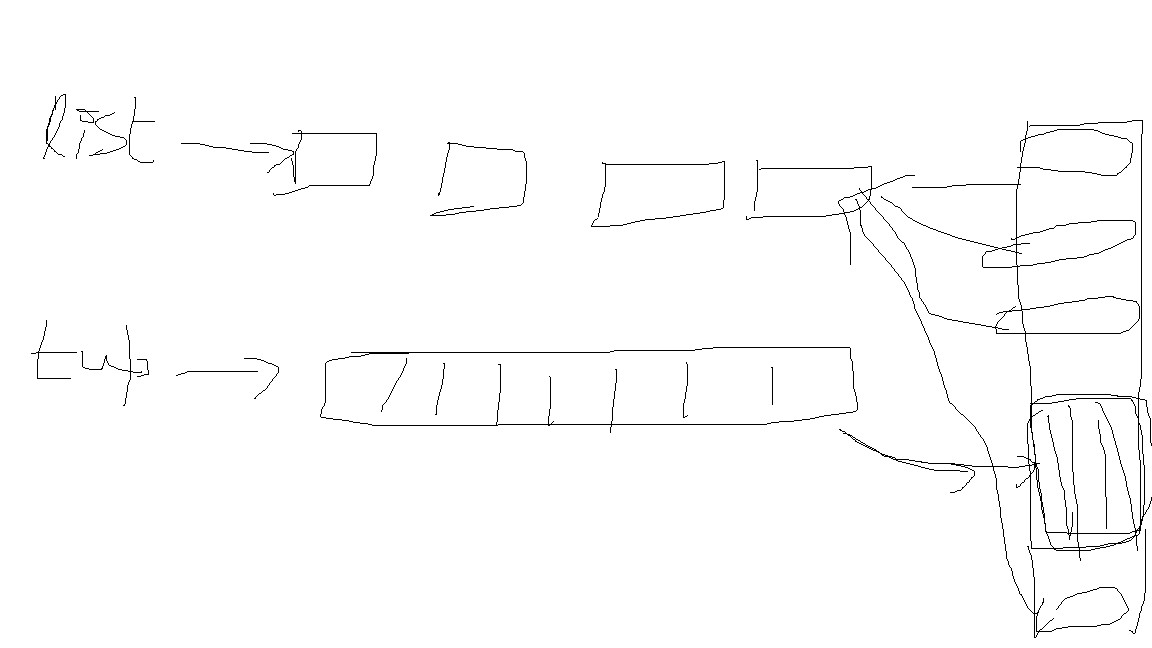

In [ ]:
Tuple1 = ("A", 1, "B", 2, "C", 3)
Tuple2 = ("Geek1", "Raju", "Geek2", "Nikhil", "Geek3", "Deepanshu")
Tuple3 = ((1, "Lion"), ( 2, "Tiger"), (3, "Fox"), (4, "Wolf"))
 
# print the sizes of sample Tuples
print("Size of Tuple1: " + str(sys.getsizeof(Tuple1)) + "bytes")
print("Size of Tuple2: " + str(sys.getsizeof(Tuple2)) + "bytes")
print("Size of Tuple3: " + str(sys.getsizeof(Tuple3)) + "bytes")

NameError: ignored

In [ ]:
Tuple1 = ("A", 1, "B", 2, "C", 3)
Tuple2 = ("Geek1", "Raju", "Geek2", "Nikhil", "Geek3", "Deepanshu")
Tuple3 = ((1, "Lion"), ( 2, "Tiger"), (3, "Fox"), (4, "Wolf"))
 
# print the sizes of sample Tuples
print("Size of Tuple1: " + str(Tuple1.__sizeof__()) + "bytes")
print("Size of Tuple2: " + str(Tuple2.__sizeof__()) + "bytes")
print("Size of Tuple3: " + str(Tuple3.__sizeof__()) + "bytes")

Size of Tuple1: 72bytes
Size of Tuple2: 72bytes
Size of Tuple3: 56bytes


In [ ]:
import cv2

# Load the pre-trained model for detecting persons
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Load the input image
img = cv2.imread('path_to_image')

# Resize the image for faster processing
img = cv2.resize(img, (640, 480))

# Detect persons in the image
rects, weights = hog.detectMultiScale(img, winStride=(4, 4), padding=(8, 8), scale=1.05)

# Draw the detected persons on the image
for (x, y, w, h) in rects:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the output image
cv2.imshow('output', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: ignored

In [ ]:
import cv2

# Create a VideoCapture object to read from the webcam
cap = cv2.VideoCapture(0)

# Define the background subtractor object
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()

    # Apply the background subtractor to get the foreground mask
    fgmask = fgbg.apply(frame)

    # Find contours in the foreground mask
    contours, hierarchy = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw a bounding box around each moving object
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 20 and h > 20:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Release the VideoCapture object and close the windows
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: ignored

In [ ]:
class JumpCounter:
def __init__(self):
        self._timestamps = []
        self._boxes = []
        self._count = 0
        self._last_jump_timestamp = None
def count_jumps(self, box, timestamp):
        if box is None:
            return self._count

        self._boxes.append(box)
        self._timestamps.append(timestamp)

        if len(self._boxes) < MIN_N_FRAMES:
            return self._count

        if len(self._boxes) > 4 * INTERPOLATION_SPAN:
            self._boxes = self._boxes[:INTERPOLATION_SPAN]
            self._timestamps = self._timestamps[:INTERPOLATION_SPAN]

        if self._check_for_jump():
            if self._last_jump_timestamp and timestamp - self._last_jump_timestamp > MAX_MILLISECONDS_BETWEEN_JUMPS:
                self._count = 0

            self._count += 1
            self._last_jump_timestamp = timestamp

        return self._count        

Creating a set


In [ ]:
Days = {"Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"}    
print(Days)    
print(type(Days))    
print("looping through the set elements ... ")    
for i in Days:    
    print(i)    

{'Saturday', 'Monday', 'Tuesday', 'Sunday', 'Friday', 'Thursday', 'Wednesday'}
<class 'set'>
looping through the set elements ... 
Saturday
Monday
Tuesday
Sunday
Friday
Thursday
Wednesday


Using set method


In [ ]:
Days = set(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])    
print(Days)    
print(type(Days))    
print("looping through the set elements ... ")    
for i in Days:    
    print(i)  

{'Saturday', 'Monday', 'Tuesday', 'Friday', 'Sunday', 'Thursday', 'Wednesday'}
<class 'set'>
looping through the set elements ... 
Saturday
Monday
Tuesday
Friday
Sunday
Thursday
Wednesday


In [ ]:
# Creating a set which have immutable elements  
set1 = {1,2,3, "JavaTpoint", 20.5, 14}  
print(type(set1))  
#Creating a set which have mutable element  
set2 = {1,2,3,["Javatpoint",4]}  
print(type(set2))  

<class 'set'>


TypeError: ignored

Using add method

In [ ]:
months = set(["January","February", "March", "April", "May", "June","September"])    
print("\nprinting the original set ... ")    
print(months)    
print("\nAdding other months to the set...");    
Months.add("July");    
Months.add ("August");    
print("\nPrinting the modified set...");    
print(Months)
months.add(["September",""])    
print("\nlooping through the set elements ... ")    
for i in Months:    
    print(i)    


printing the original set ... 
{'June', 'May', 'March', 'February', 'January', 'April', 'September'}

Adding other months to the set...

Printing the modified set...
{'August', 'June', 'May', 'July', 'March', 'February', 'January', 'April'}


TypeError: ignored

Using update function

Set is an unordered.In update sequence of elements can be added.

In [ ]:
Months = set(["January","February", "March", "April", "May", "June"])    
print("\nprinting the original set ... ")    
print(Months)    
print("\nupdating the original set ... ")    
Months.update(["July","August","September","October"]);    
print("\nprinting the modified set ... ")     
print(Months);  


printing the original set ... 
{'June', 'May', 'March', 'February', 'January', 'April'}

updating the original set ... 

printing the modified set ... 
{'August', 'June', 'October', 'May', 'July', 'March', 'February', 'January', 'April', 'September'}


Using discard method

In [ ]:
months = set(["January","February", "March", "April", "May", "June"])    
print("\nprinting the original set ... ")    
print(months)    
print("\nRemoving some months from the set...");    
months.discard("January");    
months.discard("May");    
print("\nPrinting the modified set...");    
print(months)    
print("\nlooping through the set elements ... ")    
for i in months:    
    print(i)    


printing the original set ... 
{'June', 'May', 'March', 'February', 'January', 'April'}

Removing some months from the set...

Printing the modified set...
{'June', 'March', 'February', 'April'}

looping through the set elements ... 
June
March
February
April


pop


In [ ]:
Months = set(["January","February", "March", "April", "May", "June"])    
print("\nprinting the original set ... ")    
print(Months)    
print("\nRemoving some months from the set...");    
Months.pop();    
Months.pop();    
print("\nPrinting the modified set...");    
print(Months)    


printing the original set ... 
{'June', 'May', 'March', 'February', 'January', 'April'}

Removing some months from the set...

Printing the modified set...
{'March', 'February', 'January', 'April'}


clear

In [ ]:
Months = set(["January","February", "March", "April", "May", "June"])    
print("\nprinting the original set ... ")    
print(Months)    
print("\nRemoving all the items from the set...");    
Months.clear()    
print("\nPrinting the modified set...")    
print(Months)   


printing the original set ... 
{'June', 'May', 'March', 'February', 'January', 'April'}

Removing all the items from the set...

Printing the modified set...
set()


Union sets

In [ ]:
Days1 = {"Monday","Tuesday","Wednesday","Thursday", "Sunday"}    
Days2 = {"Friday","Saturday","Sunday"}    
print(Days1|Days2) #printing the union of the sets   

{'Saturday', 'Monday', 'Sunday', 'Tuesday', 'Friday', 'Thursday', 'Wednesday'}


Union method

In [ ]:
Days1 = {"Monday","Tuesday","Wednesday","Thursday"}    
Days2 = {"Friday","Saturday","Sunday"}    
print(Days1.union(Days2)) #printing the union of the sets 

{'Saturday', 'Monday', 'Tuesday', 'Friday', 'Sunday', 'Thursday', 'Wednesday'}


Intersection by symbol

In [ ]:
Days1 = {"Monday","Tuesday", "Wednesday", "Thursday"}    
Days2 = {"Monday","Tuesday","Sunday", "Friday"}    
print(Days1&Days2) #prints the intersection of the two sets  

{'Monday', 'Tuesday'}


Intersection method

In [ ]:
set1 = {"Devansh","John", "David", "Martin"}    
set2 = {"Steve", "Milan", "David", "Martin"}    
print(set1.intersection(set2)) #prints the intersection of the two sets    

{'David', 'Martin'}


Intersection_update

In [ ]:
a = {"Devansh", "bob", "castle"}    
b = {"castle", "dude", "emyway"}    
c = {"fuson", "gaurav", "castle"}    
    
a.intersection_update(b, c)    
    
print(a)    

{'castle'}


In [ ]:
Days1 = {"Monday",  "Tuesday", "Wednesday", "Thursday"}    
Days2 = {"Monday", "Tuesday", "Sunday"}    
print(Days1-Days2) #{"Wednesday", "Thursday" will be printed}    

{'Thursday', 'Wednesday'}
